## 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Data Loading, Exploration, and Cleaning

In [2]:
df = pd.read_csv('../DataSets/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# set options to display max columns
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows' , None )
# hide all warnings
#import warnings
#warnings.filterwarnings("ignore") 
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


### a. Looking for max number of rows

In [5]:
print(f"The maximum number of rows are {df.shape[0]}")

The maximum number of rows are 10841


### b. How to make size a numeric column

In [6]:
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: count, Length: 461, dtype: int64

In [7]:
# checking for missing values
df['Size'].isnull().sum()

0

In [8]:
# Finding values that have M in them
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

8830

In [9]:
# Finding values that have k in them
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [10]:
# Finding values that have varies with device in them
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

1695

In [11]:
print(f"Total number of rows are {len(df)}")
1695+316+8829

Total number of rows are 10841


10840

In [12]:
# Lets define a function
def conver_size(size):
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * (1024 ** 2)
        else:
            return np.nan
    return size



In [13]:
# lets apply this function
df['Size'] = df['Size'].apply(conver_size)

In [14]:
df['Size']

0        19922944.0
1        14680064.0
2         9122611.2
3        26214400.0
4         2936012.8
            ...    
10836    55574528.0
10837     3774873.6
10838     9961472.0
10839           NaN
10840    19922944.0
Name: Size, Length: 10841, dtype: float64

In [15]:
df.rename(columns={'Size': 'Size_in_bytes'}, inplace=True)

In [16]:
# For size in Mbs
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x/(1024*1024))
df.head(10)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5872025.6,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up,5.6
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19922944.0,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,19.0
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,30408704.0,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,29.0
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,34603008.0,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,33.0
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3250585.6,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,3.1


### b. Lets look into the Install column

In [17]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [18]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)

In [19]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: count, dtype: int64

### c. Lets have a look at the price column

In [20]:
df['Price'].value_counts()

Price
0         10041
$0.99       148
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: count, Length: 92, dtype: int64

In [21]:
# Lets see how many have $ sign
#df['Price'].loc[df['Price'].str.startswith('$')].value_counts().sum()
# This code counts the number of rows having 0 but not having $ sign
#df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('$'))].value_counts().sum()
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\UZAIR\AppData\Local\Temp\ipykernel_20844\2819910803.py:5: SyntaxWarning: invalid escape sequence '\$'
  df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()


800

In [22]:
# Replacing $ sign and converting to numeric value
df['Price'] = df['Price'].apply(lambda x: x.replace("$", "") if '$' in str(x) else x)
#df['Price'] = pd.to_numeric(df['Price'])
df['Price'] = df['Price'].apply(lambda x: float(x))
df['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10836    0.0
10837    0.0
10838    0.0
10839    0.0
10840    0.0
Name: Price, Length: 10841, dtype: float64

### d. Now we will look for missing values

In [23]:
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes     1695
Size_in_Mb        1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
Genres               1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Last Updated         0
dtype: int64

In [24]:
# finding missing values percentage in the data
round(df.isnull().sum()/len(df) * 100, 2).sort_values(ascending=False)

Size_in_bytes     15.64
Size_in_Mb        15.64
Rating            13.60
Current Ver        0.07
Android Ver        0.02
Type               0.01
Genres             0.01
App                0.00
Category           0.00
Reviews            0.00
Installs           0.00
Price              0.00
Content Rating     0.00
Last Updated       0.00
dtype: float64

Text(0.5, 1.0, 'Percentage of missing values in each column')

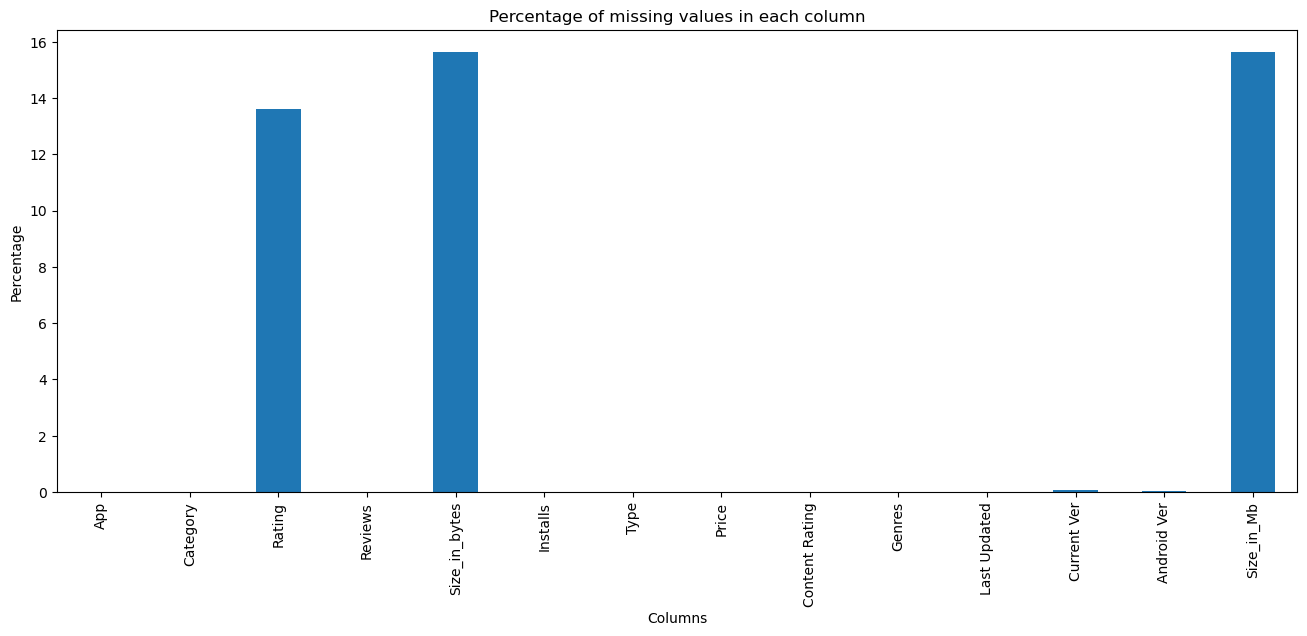

In [25]:
# Make figure size
plt.figure(figsize=(16,6))
# Plot the null values by percentage in each column
missing_percentage = df.isnull().sum()/len(df) * 100
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title("Percentage of missing values in each column")

<Axes: >

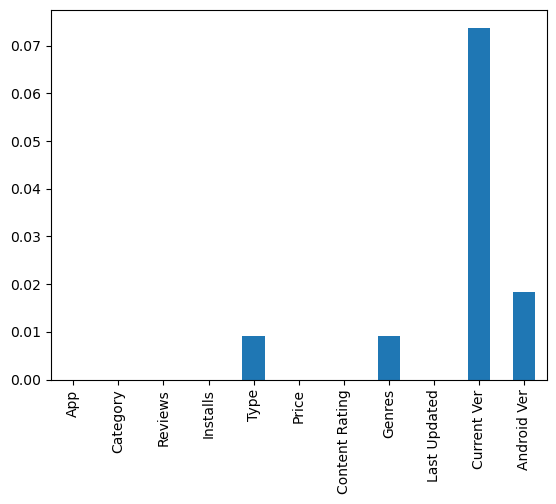

In [26]:
missing_percentage[missing_percentage < 1].plot(kind='bar')

### e. Making a new column "Install Category" which will have the category of Install 

In [27]:
df['Installs'] = df['Installs'].astype('Int64')
df['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10841, dtype: Int64

In [28]:
bins =  [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 100000000]
labels = ["No", "Very Low", "Low", "Moderate", "Better than Moderate", "High", "Very High", "Top Notch"]
df['Install_category'] = pd.cut(df["Installs"], bins=bins, labels=labels)

In [29]:
df['Install_category'].value_counts()

Install_category
Low                     2162
High                    2118
Very High               2004
Better than Moderate    1648
Moderate                1531
Top Notch                698
Very Low                 535
No                        15
Name: count, dtype: int64

<Axes: xlabel='Install_category'>

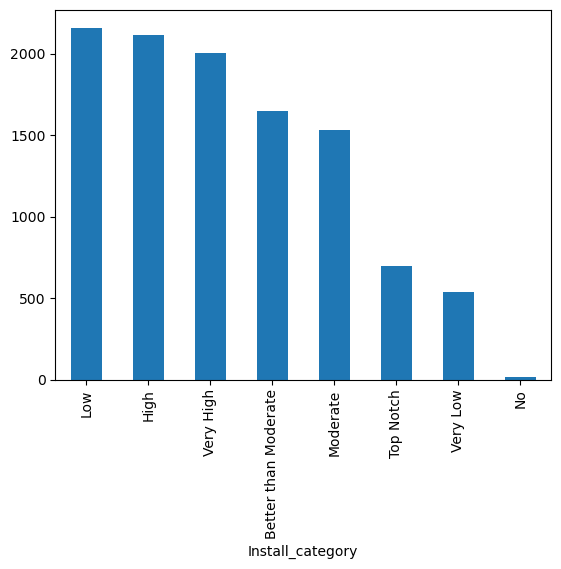

In [30]:
df['Install_category'].value_counts().plot(kind='bar')

In [31]:
# Finding min, max and average price of the app
print(f"minimum price of app is: {df['Price'].min()}$")
print(f"maximum price of app is: {df['Price'].max()}$")
print(f"average price of app is: {df['Price'].mean()}$")

minimum price of app is: 0.0$
maximum price of app is: 400.0$
average price of app is: 1.0272733142699015$


### Handling missing values
1. We have 1695 missing values in 'Size_in_bytes' and 'Size_in_Mb' columns which is 15.6% of the total values in the column.
2. We have 1474 missing values in 'Ratings' column which is 13.6% of the total values in the column.
3. We have 8 missing values in 'Current Ver' column which is 0.07% of the total values in the column.
4. We have 2 missing values in 'Android Ver' column which is 0.07% of the total values in the column.
5. We have 1 missing value in 'Category', 'Type', and 'Genres' columns which is 0.01% of the total values in the column

In [34]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,10841.0,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,15462912.506872,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,85025568.991872,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.0,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1000.0,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,100000.0,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5000000.0,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1000000000.0,400.000000,100.000000


In [35]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Install_category'],
      dtype='object')

<Axes: >

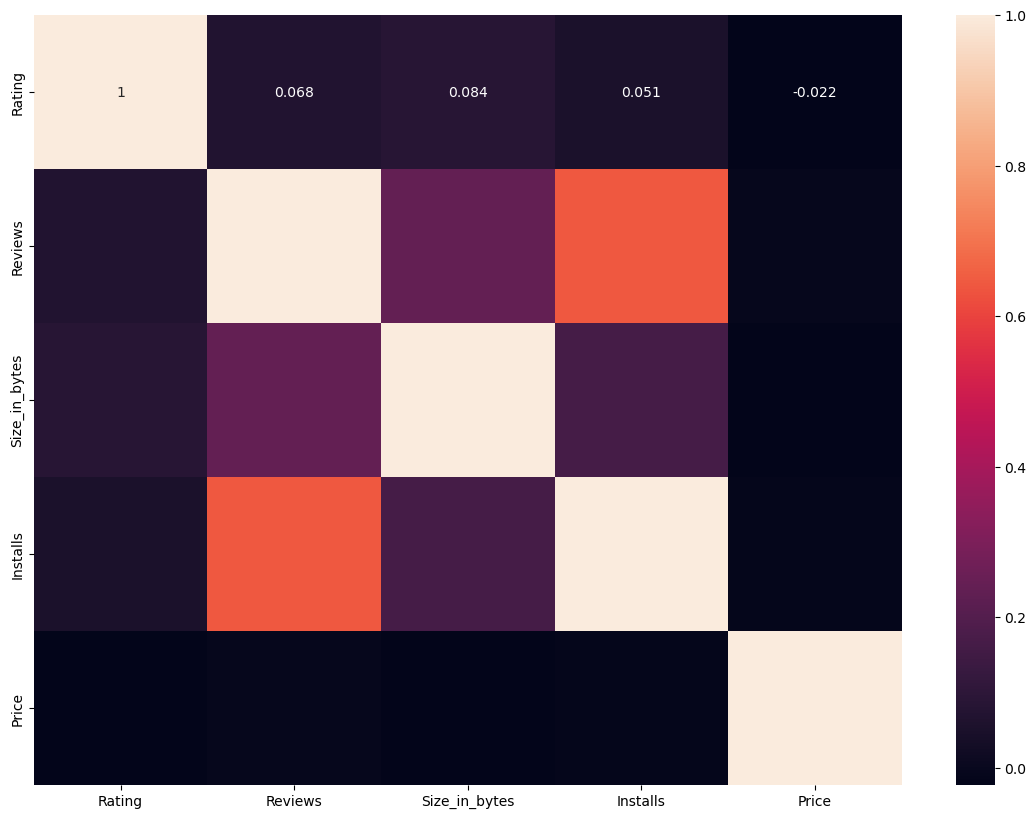

In [41]:
plt.figure(figsize=(14,10))
numeric_columns = ['Rating', 'Reviews', 'Size_in_bytes', 'Installs', 'Price']
sns.heatmap(df[numeric_columns].corr(), annot=True)

In [42]:
# remove the rows having null values
df.dropna(subset = ['Category','Type', 'Genres','Current Ver', 'Android Ver'], inplace=True)
print(f"The length of dataframe after removing null values are: {len(df)}")

The length of dataframe after removing null values are: 10829


In [43]:
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes       1694
Size_in_Mb          1694
Rating              1469
Install_category     130
App                    0
Category               0
Reviews                0
Installs               0
Type                   0
Price                  0
Content Rating         0
Genres                 0
Last Updated           0
Current Ver            0
Android Ver            0
dtype: int64